In [57]:
# k-nearest neighbors for regression from scratch
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [40]:
# toy data
#x = np.array([[0, 2, 4, 6, 7, 8]])
#y = np.array([[0, 1, 2, 2, 1, 0]])

data = {'x':  [0, 2, 4, 6, 7, 8],
        'y': [0, 1, 2, 2, 1, 0]
        }

df = pd.DataFrame (data, columns = ['x','y'])

In [10]:
df

,x,y
0,0,0
1,2,1
2,4,2
3,6,2
4,7,1
5,8,0


In [7]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [8]:
# Calculate the taxicab distance between two points
def taxicab_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += np.absolute(row1[i] - row2[i])
    return distance

In [6]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for index,train_row in train.iterrows():
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [11]:
# checking get_neighbors
get_neighbors(df.iloc[0:5,:], df.iloc[5,:], 2)

[x    7
 y    1
 Name: 4, dtype: int64, x    6
 y    2
 Name: 3, dtype: int64]

In [12]:
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    #prediction = max(set(output_values), key=output_values.count)
    prediction = np.mean(output_values)
    return prediction

In [28]:
# checking predict_classification
predict_classification(df.iloc[0:5,:], df.iloc[5,:], 2)

1.5

In [29]:
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    output = predict_classification(train, test, num_neighbors)
    predictions.append(output)
    return(predictions)

In [31]:
k_nearest_neighbors(df.iloc[0:5,:], df.iloc[5,:], 3)

[1.6666666666666667]

C:\Users\heyon\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\heyon\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


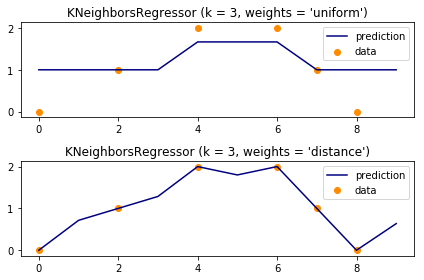

In [53]:
# k-nearest neighbors for regression with sklearn
from sklearn.neighbors import KNeighborsRegressor

#np.random.seed(0)
#X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 9, 10)[:, np.newaxis]
#y = np.sin(X).ravel()

x = df['x'].reshape(-1,1)
y = df['y'].reshape(-1,1)

# https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html
# Fit regression model
n_neighbors = 3

for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(x, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(x, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

In [47]:
knn.predict([[3]])

array([[ 1.28571429]])

In [60]:
# finding the best k

from sklearn.model_selection import cross_val_score
# creating a list of K for KNN
neighbors = list((2, 3, 4))

# empty list that will hold cv scores
cv_scores = []

# perform 5-fold cross validation
for k in neighbors:
    model = KNeighborsRegressor(n_neighbors=k)
    #scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')    
    cv_scores.append(scores.mean())

In [58]:
# checking out list of metrics that could be used
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

The optimal number of neighbors is 4


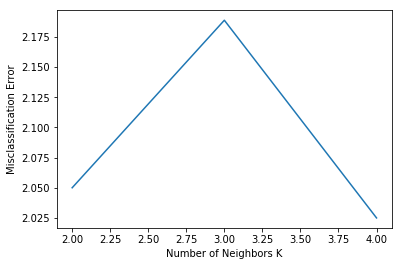

In [61]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()